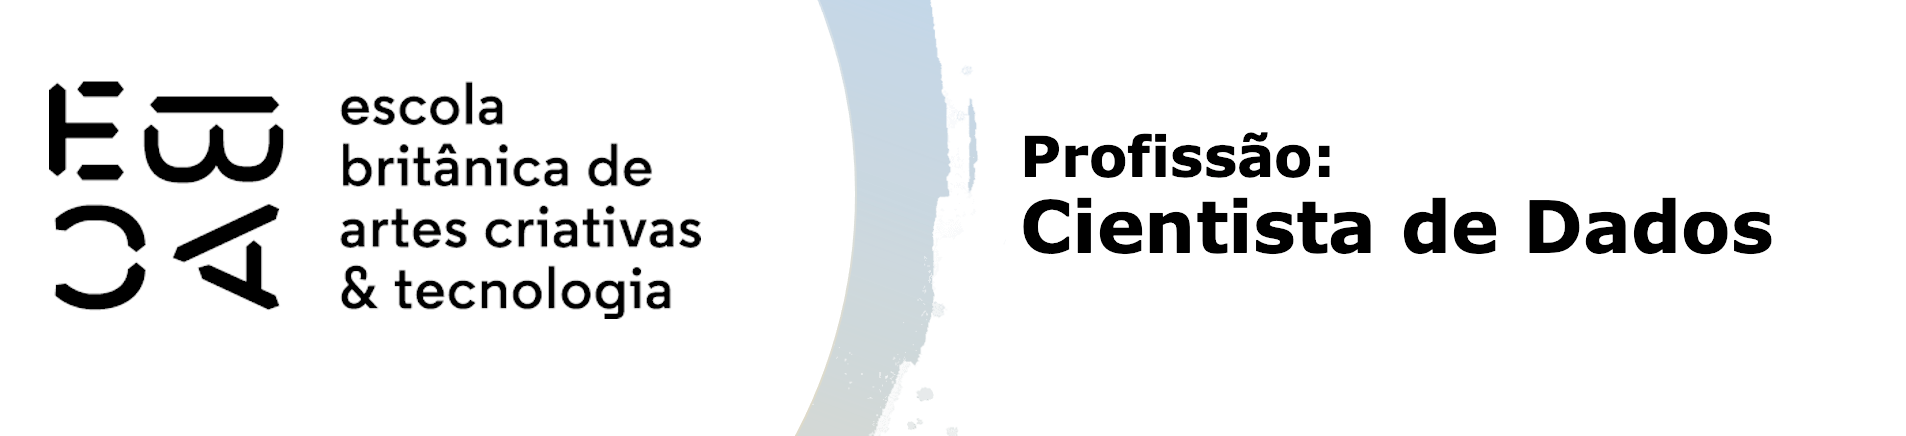

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# Selecionando as variáveis quantitativas da base de dados
peng = sns.load_dataset('penguins')
peng.index.name = 'id'
peng_quant = peng.select_dtypes(include='number')

In [3]:
# Eliminando valores faltantes 
peng_quant = peng_quant.dropna()

In [4]:
# Padronizando as variáveis
sc = StandardScaler()
peng_pad = sc.fit_transform(peng_quant)
peng_pad

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [5]:
# Agrupamento hierárquico com 3 bases
clus = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [6]:
peng_quant['grupo'] = clus.labels_
peng_quant.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [7]:
peng = peng.merge(peng_quant['grupo'], how='left', on='id')

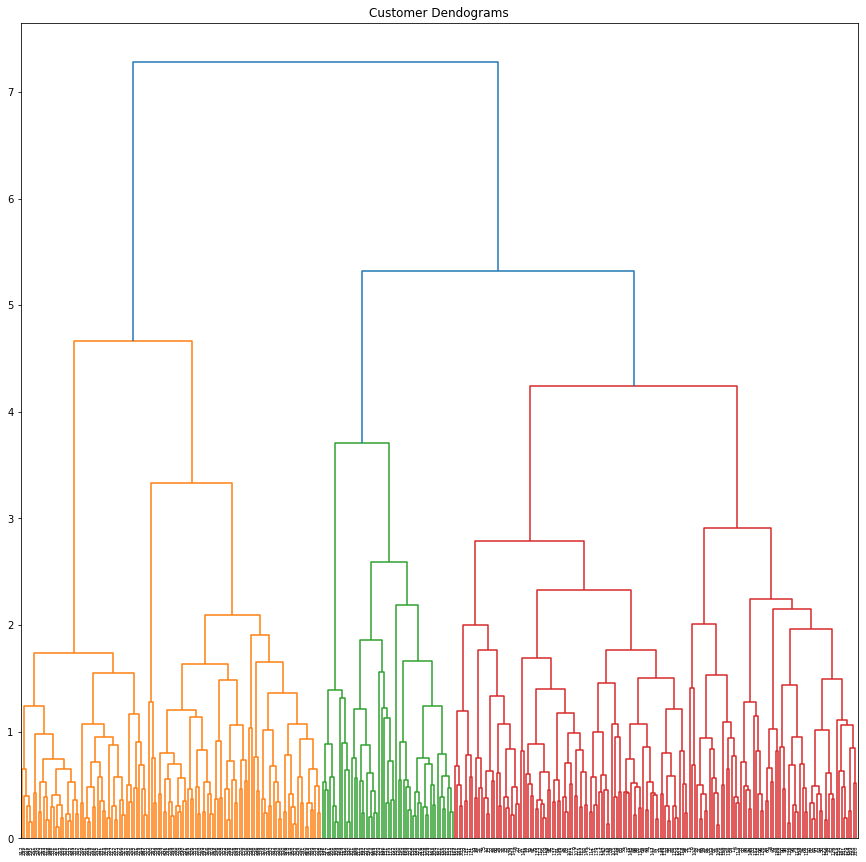

In [8]:
# Dendograma

plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [10]:
# Número de espécies que o agrupamento acertou
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

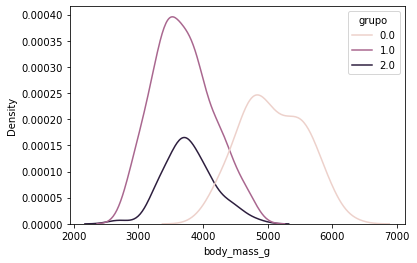

In [11]:
# Body_mass_g
sns.kdeplot(
    data=peng,
    x="body_mass_g",
    hue="grupo",
    thresh=.1,
)

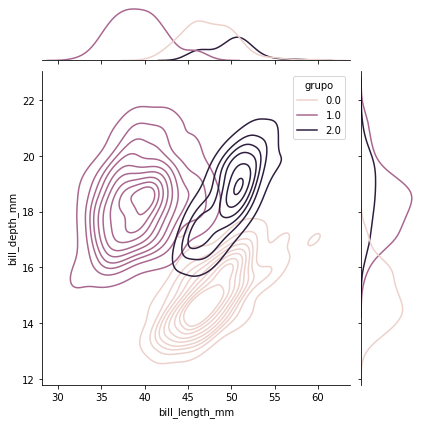

In [12]:
# bill_length_mm, bill_depth_mm

g = sns.jointplot(
    data=peng,
    x="bill_length_mm", y="bill_depth_mm", hue="grupo",
    kind="kde",
)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

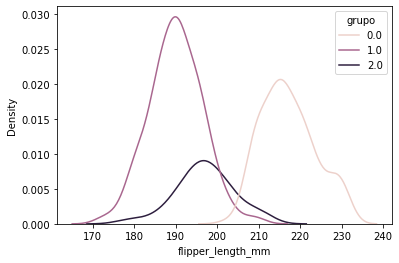

In [13]:
# flipper_length_mm
# Body_mass_g
sns.kdeplot(
    data=peng,
    x="flipper_length_mm",
    hue="grupo",
    thresh=.1,
)

In [14]:
peng.groupby(['grupo'])[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']].apply('median')

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g
grupo,,,,
0.0,216.0,47.30,15.0,5000.0
1.0,190.0,39.10,18.3,3650.0
2.0,197.0,50.25,18.7,3737.5


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [15]:
# Agrupamento hierárquico com 6 bases
clus = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=6)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [16]:
peng_quant['grupo'] = clus.labels_
peng_quant.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [18]:
peng_quant['grupo'].value_counts()

1    96
0    71
2    69
3    52
4    42
5    12
Name: grupo, dtype: int64

In [19]:
peng = peng.merge(peng_quant['grupo'], how='left', on='id')

In [45]:
pd.crosstab(peng['sex'], peng['grupo_y'])

grupo_y,0.0,1.0,2.0,3.0,4.0,5.0
sex,,,,,,
Female,9,74,13,49,20,0
Male,61,18,55,0,22,12


### Pela distribuição é natural perceber que as caracteristicas entre machos e fêmeas é relevante, menos no grupo 4.0, onde é bastante equilibrado. Ainda parece ser uma melhor distribuição de 3 agrupamentos.